# Integral Equation Model Comparisons
Purpose of this notebook is to EOS calculations for comparisons to George Petrov's Average Atom model, and Morales EOS Hydrogen paper

[https://journals.aps.org/pre/abstract/10.1103/PhysRevE.81.021202](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.81.021202)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")


### Set Parameters in Paper and Plot

In [11]:
name = 'Hydrogen'
Z, A = 1,1 

Te_eV_list = [0.172347, 1.000000 ]
Ti_eV_list = Te_eV_list
# ni_cc = 5.98e23
# ni_AU = ni_cc/cm_to_AU**3

# ri_cm = rs_from_n(ni_cc)  # cm
# ri_AU = ri_cm*cm_to_AU    # AU 

ri_AU = 1.3914542638521432
ni_cc = n_from_rs(ri_AU/cm_to_AU)

In [12]:
ri_AU

1.3914542638521432

#### Load atoMEC data

In [5]:
atoMEC_files = ["",""]

def get_atoMEC_gei(file):      
    atoMEC_df = read_csv(file, delim_whitespace=True, header=0)
    ne_?? = atoMEC_df[]
    
    # nbar_f = (Z-AA_Zbar)/( 4/3*π*ri**3 )
    # nbar_b = AA_Zbar/ (  4/3*π*ri**3 )
    nbar_tot = Z/( 4/3*π*ri**3 )
    
    AA_data = read_csv(file, delim_whitespace=True,header=0)
    # unbound_h = np.array( (AA_data['n[unbound]'])/nbar_f )
    # bound_h = np.array((AA_data['n[bound]'])/nbar_b)/2
    total_gei = np.array((AA_data['n[bound]'] + AA_data['n[unbound]'])/nbar_tot)
    return AA_data['r[a_0]'], total_gei    

#### Run Ornstein-Zernike Closure

In [13]:
name1 = 'OZ - g'
plasma1 = lambda T_eV: PLASMA(Z, A, ni_cc, T_eV, T_eV, Zbar=Z,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'geometric'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})
name2 = 'OZ - th'
plasma2 = lambda T_eV: PLASMA(Z, A, ni_cc, T_eV, T_eV, Zbar=Z,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'thermal'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})
name3 = 'OZ - th  Pauli'
plasma3 = lambda T_eV: PLASMA(Z, A, ni_cc, T_eV, T_eV, Zbar=Z, find_βuee=True,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'thermal'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})
name4 = 'SVT - th'
plasma4 =  lambda T_eV: PLASMA(Z, A, ni_cc, T_eV, T_eV, Zbar=Z,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'svt'},
                 hnc_solve_options={'alpha_Picard':0.5,'num_iterations':1e4})

P_hnc_to_AU   = lambda P_hnc: (P_hnc/ri_AU**3) 
P_hnc_to_bar  = lambda P_hnc: P_hnc_to_AU(P_hnc) *  AU_to_bar 
P_hnc_to_Mbar = lambda P_hnc: 1e-6*P_hnc_to_bar(P_hnc)
P_hnc_to_GPa  = lambda P_hnc: P_hnc_to_bar(P_hnc) * 1e5 / 1e9 

### Compute all plasma models for list of densities

In [16]:
P_list_1 = []
P_list_2 = []
P_list_3 = []
P_list_4 = []

for T_eV in Te_eV_list:
    """
    """
    #1
    # plasma = plasma1(T_eV)
    # Pe_id, Pe_ex, Pe = plasma_output(plasma)
    # P_list_1.append( [Pe_id, Pe_ex, Pe] )
    #2
    # plasma = plasma2(T_eV)
    # Pe_id, Pe_ex, Pe = plasma_output(plasma)
    # P_list_2.append( [Pe_id, Pe_ex, Pe] )
    #3
    plasma = plasma3(T_eV)
    plasma.run_hnc()
    P_list_3.append( plasma )
    #4
    # plasma = plasma4(T_eV)
    # Pe_id, Pe_ex, Pe = plasma_output(plasma)
    # P_list_4.append( [Pe_id, Pe_ex, Pe] )
    

Te_in_eV: 0.172
Ti_in_eV: 0.172
0: Initial condition Total Error: 1.064e+01
Exiting status 0, reverting to best index so far: 804
Final iter:805, Total Error: 9.960e-09
Te_in_eV: 1.000
Ti_in_eV: 1.000
0: Initial condition Total Error: 3.065e+00
Exiting status 0, reverting to best index so far: 188
Final iter:189, Total Error: 9.663e-09


Now Plot 

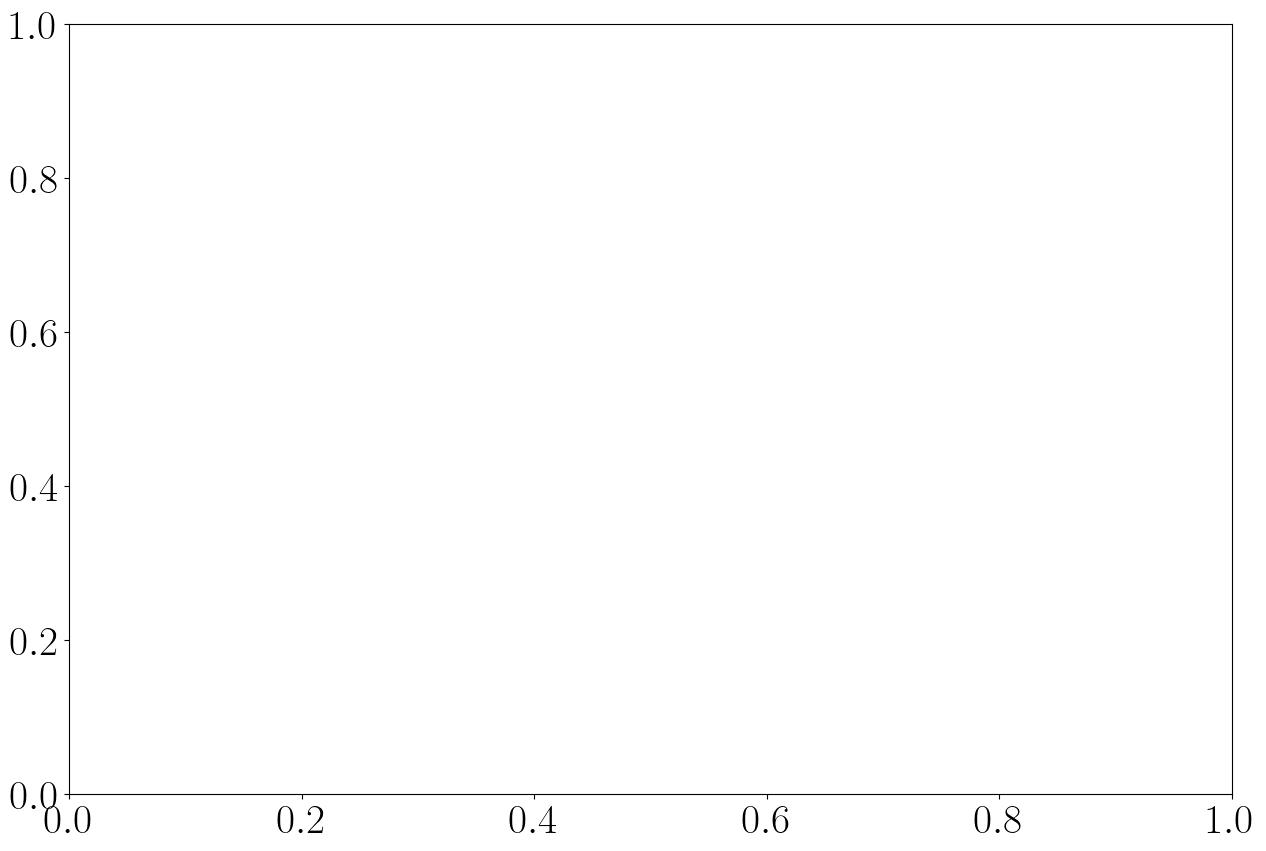

In [17]:
fig, ax  = plt.subplots()

# plot atoMEC curves
# ax.plot()

# plot cmHNC curves
ax.plot()